<a href="https://colab.research.google.com/github/My1nonly/PCVK_smt6_2023/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


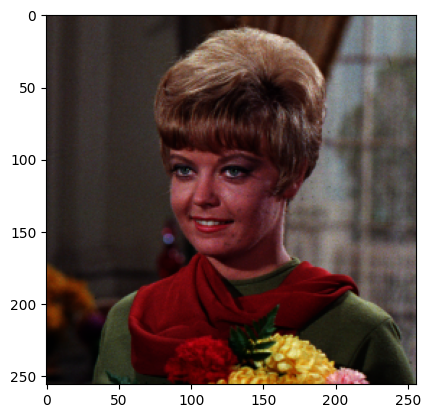

In [3]:
img = cv.imread('/content/drive/MyDrive/images/female.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Gamma correction on images
-----------------------------------
Enter Gamma Value: 3


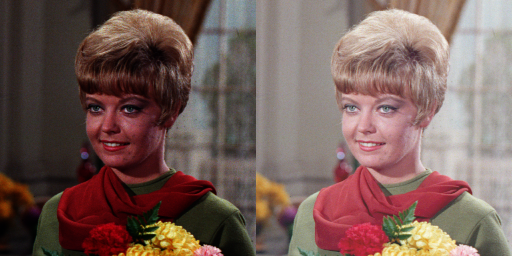

In [4]:
#Gamma Correction
print('Gamma correction on images')
print('-----------------------------------')
try:
  gamma = int(input('Enter Gamma Value: '))
except ValueError:
    print('Error, not a number')

original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
      gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z] / 255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


Image depth simulation
-------------------------------
Enter Bit Depth Value: 2


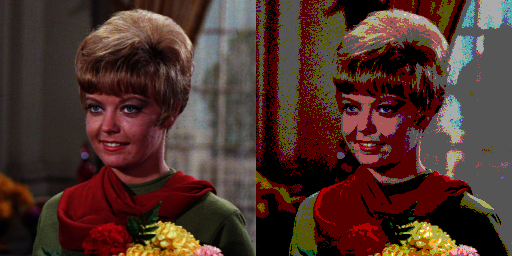

In [5]:
# Create Image Depth Simulation
original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print('Image depth simulation')
print('-------------------------------')
try:
  bd = float(input('Enter Bit Depth Value: '))
except ValueError:
  print('Error, not a number')

level = 255 / (pow(2, bd) -1)

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
      gamma_image[x,y,z] = np.clip(round(original[x,y,z] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


PSNR value =  27.70441627833673 (dB)


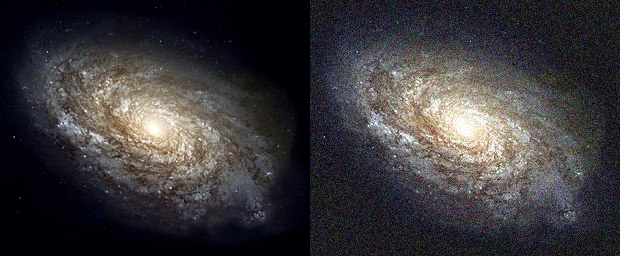

In [6]:
#Create average denoising
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/images/noises/*'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      dst = cv.addWeighted(cv_img[1], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value = ', psnr, '(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR Value =  27.52086505776816 (dB)


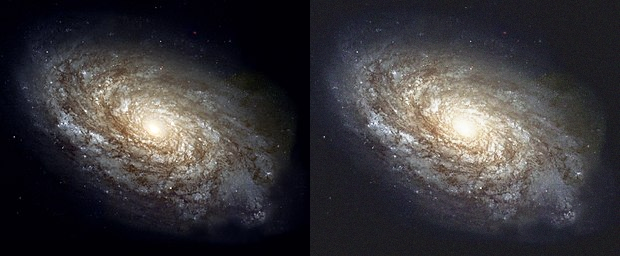

In [24]:
#Create average Denoising.
#Number 3.2 (Image : 30)

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR Value = ',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR Value =  27.485757638732142 (dB)


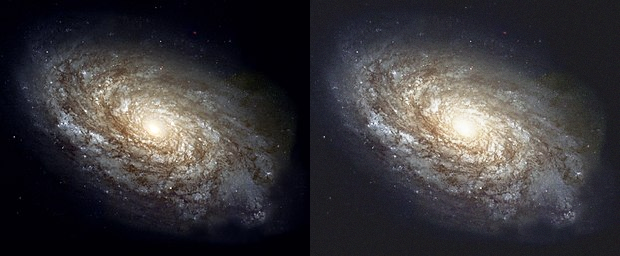

In [23]:
# Create average denoising
#number 3.3 (image: 60)

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
  
compressed = dst
psnr = PSNR(original, compressed)

print('PSNR Value = ',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR Value =  27.507500880013627 (dB)


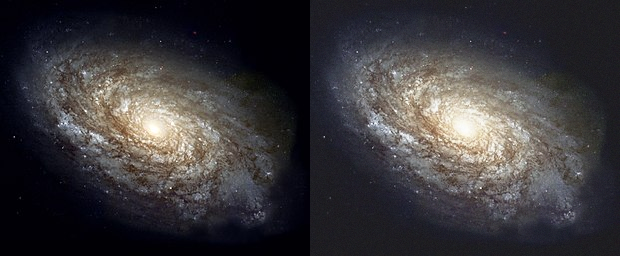

In [22]:
#Create average denoising
#number 3.4 (image: 80)

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR Value = ',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR Value =  27.518003238591472 (dB)


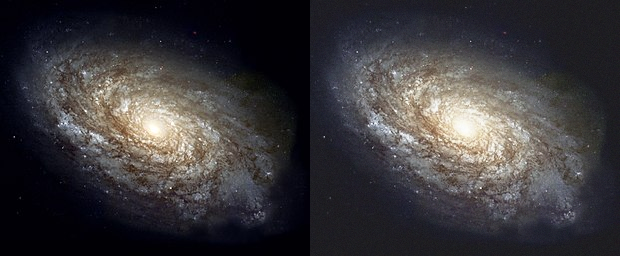

In [21]:
#Create average denoising
#number 3.4 (image: 80)

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR Value = ',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

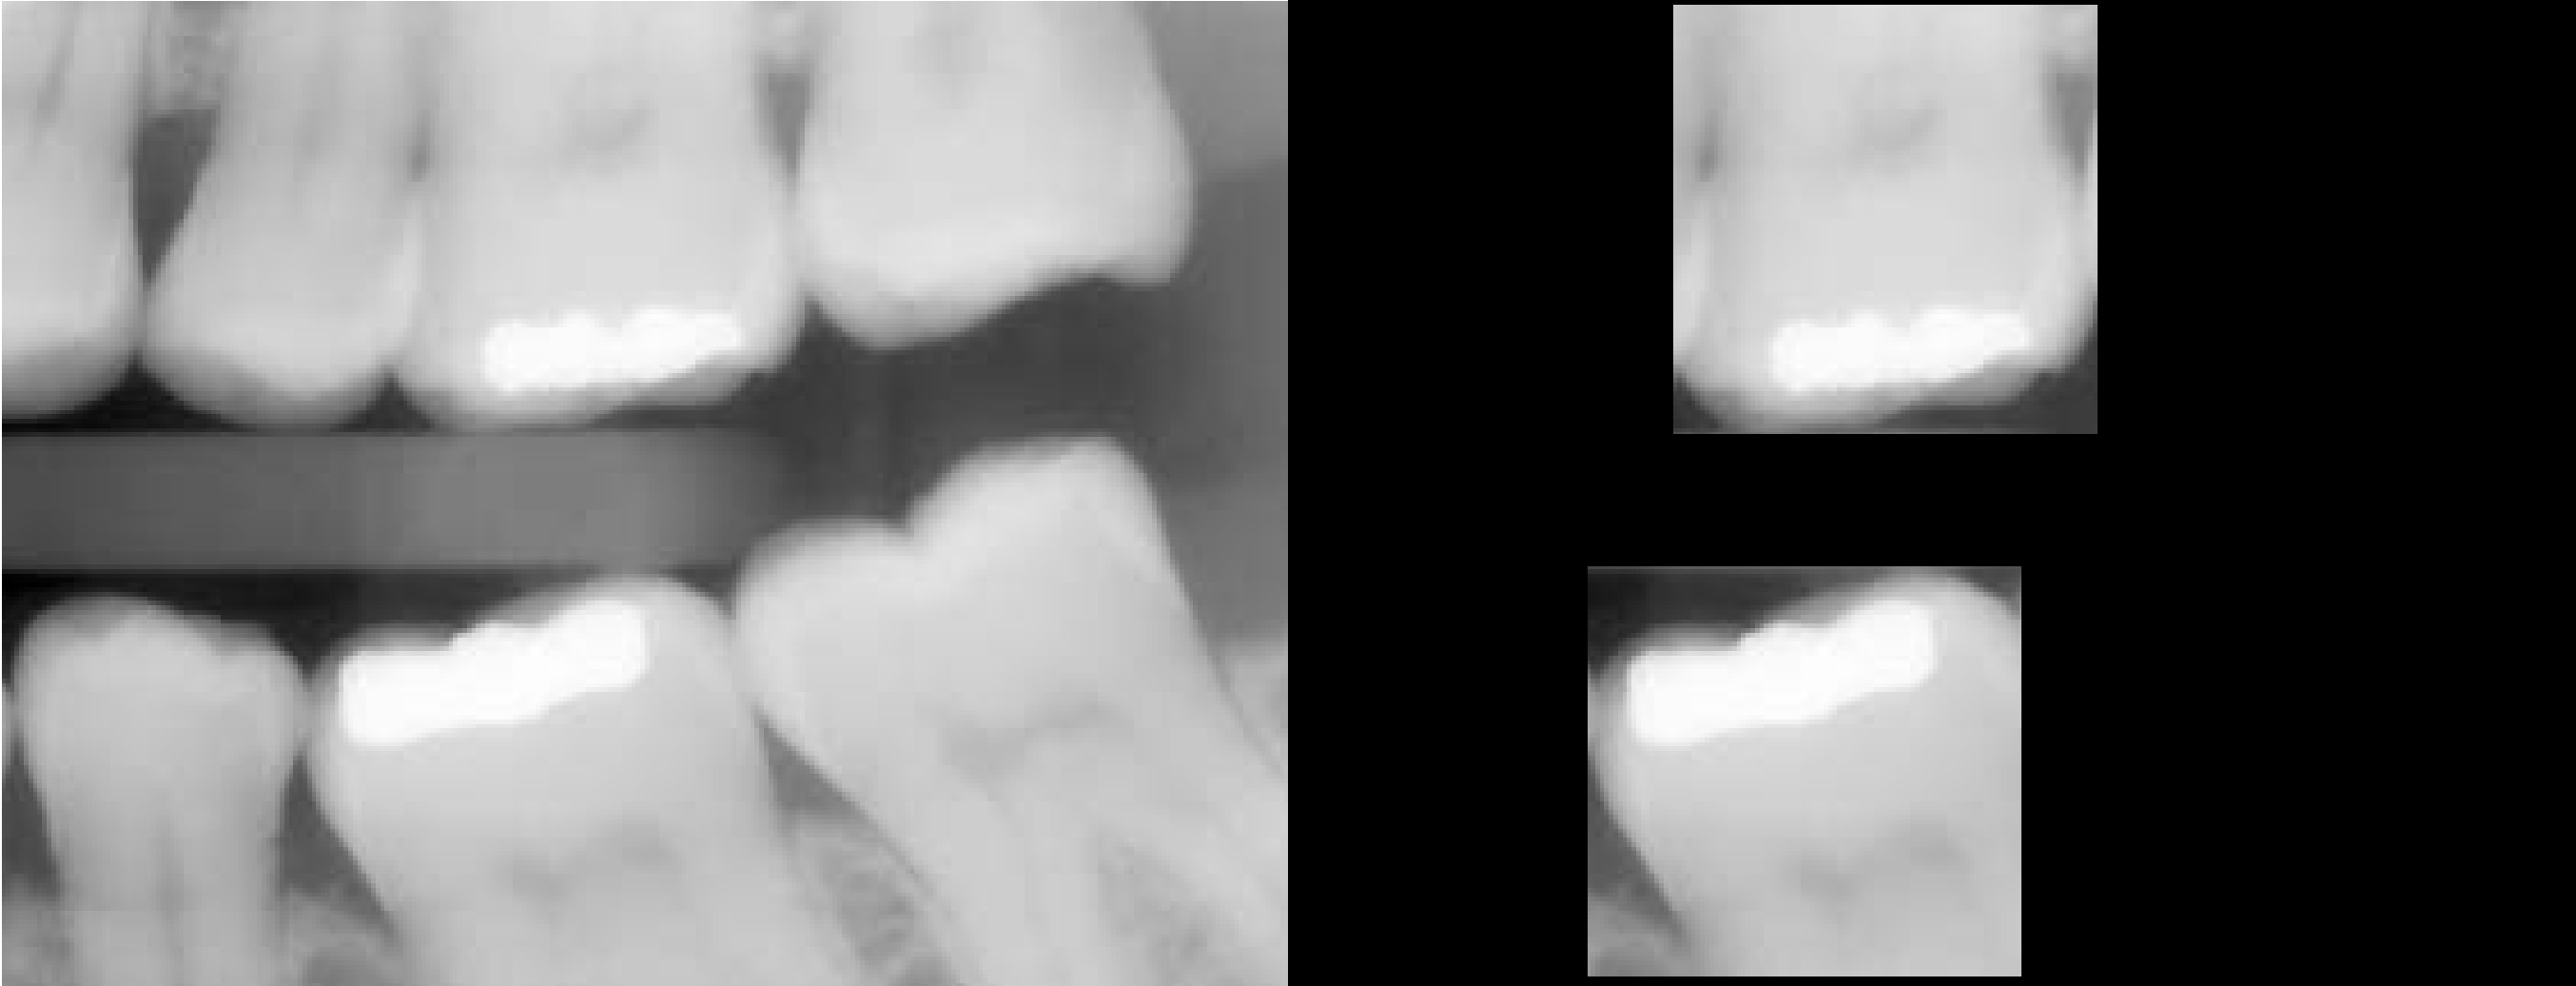

In [19]:
#Create Image Masking
img_t = cv.imread('/content/drive/MyDrive/images/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask, pt1=(315,595),pt2=(770,1025),color=(255,255,255), thickness=-1)
result = img_t & mask
mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255), thickness=-1)
result = img_t & mask1
teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

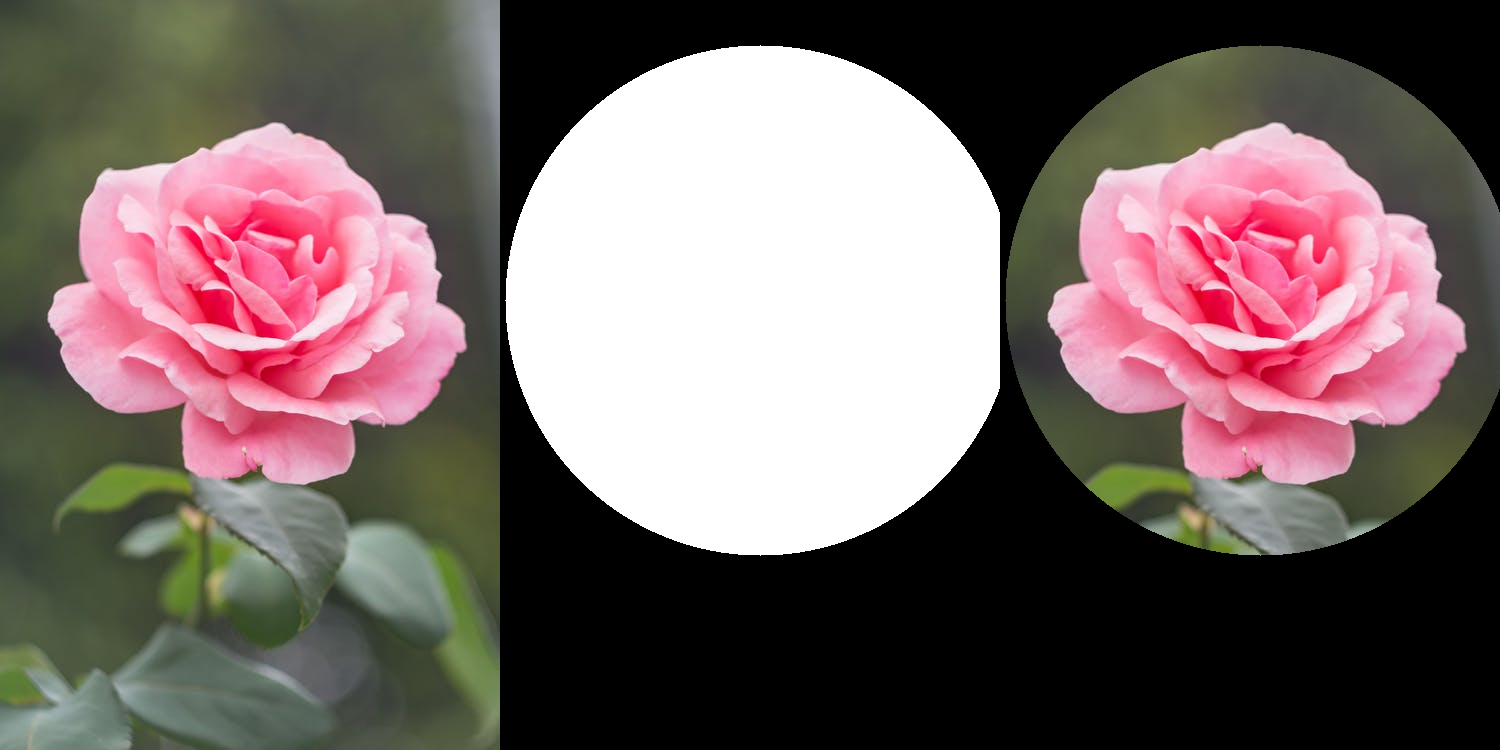

In [17]:
#Example of operator AND

img_rose = cv.imread('/content/drive/MyDrive/images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260,300), 255, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

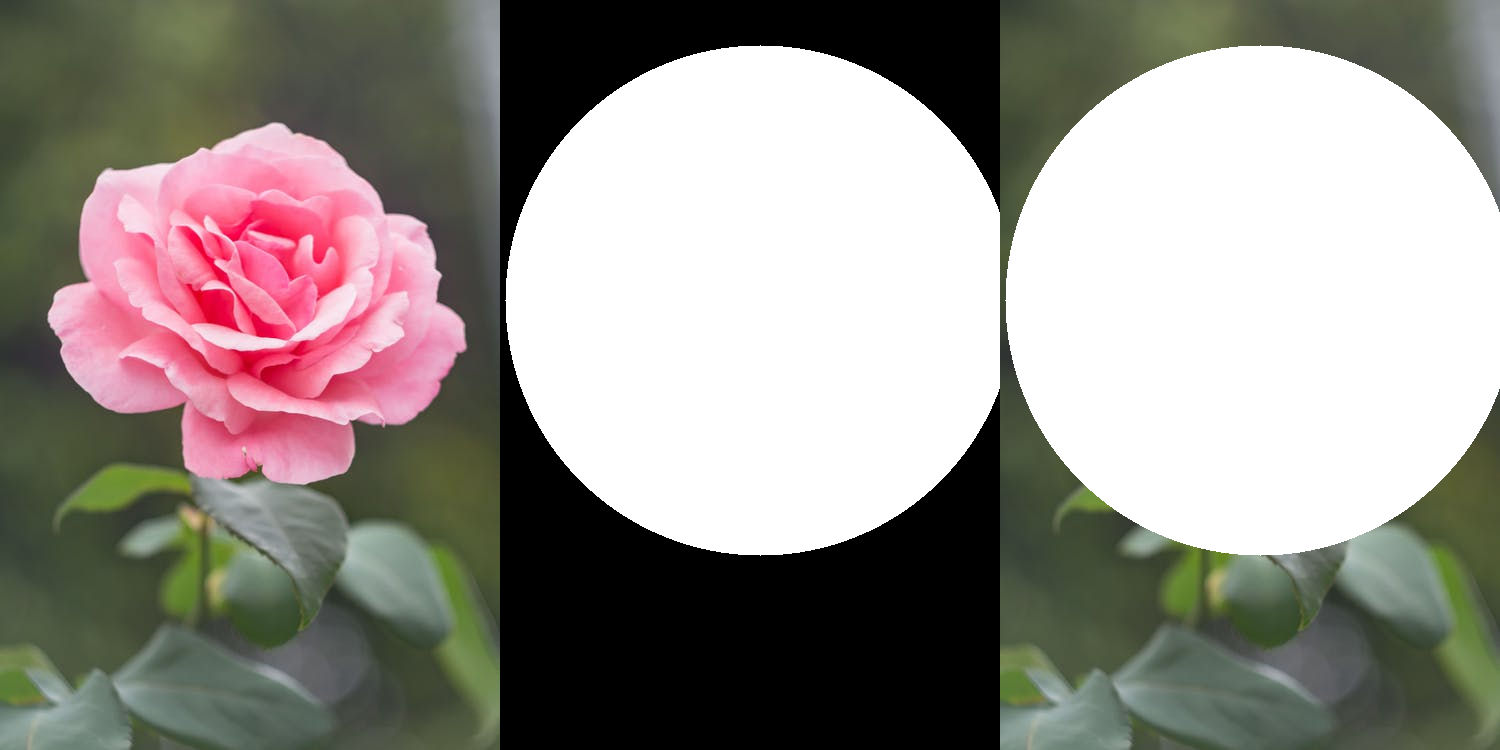

In [25]:
#Example using operator OR

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260,300), 255, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

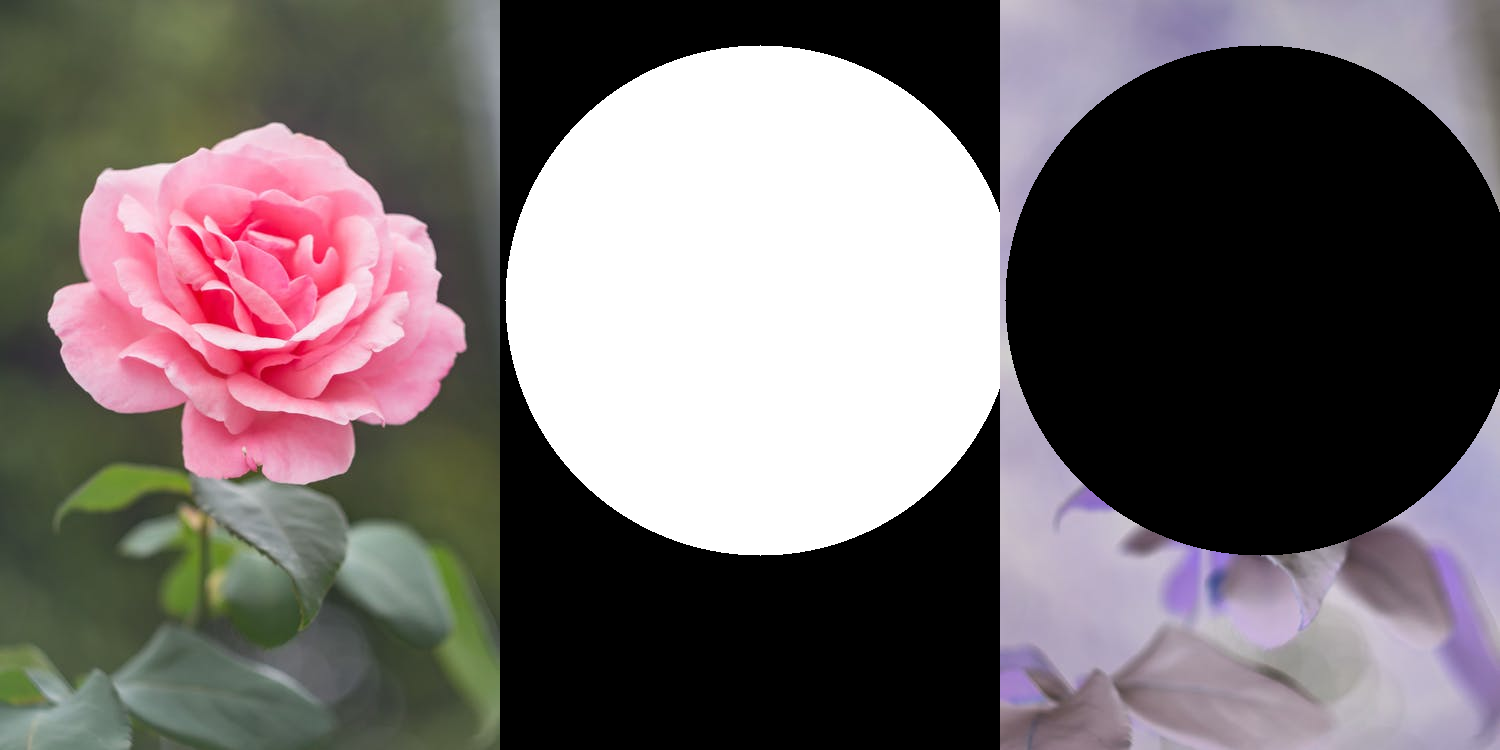

In [30]:
#Example using operator NOT

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260,300), 255, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

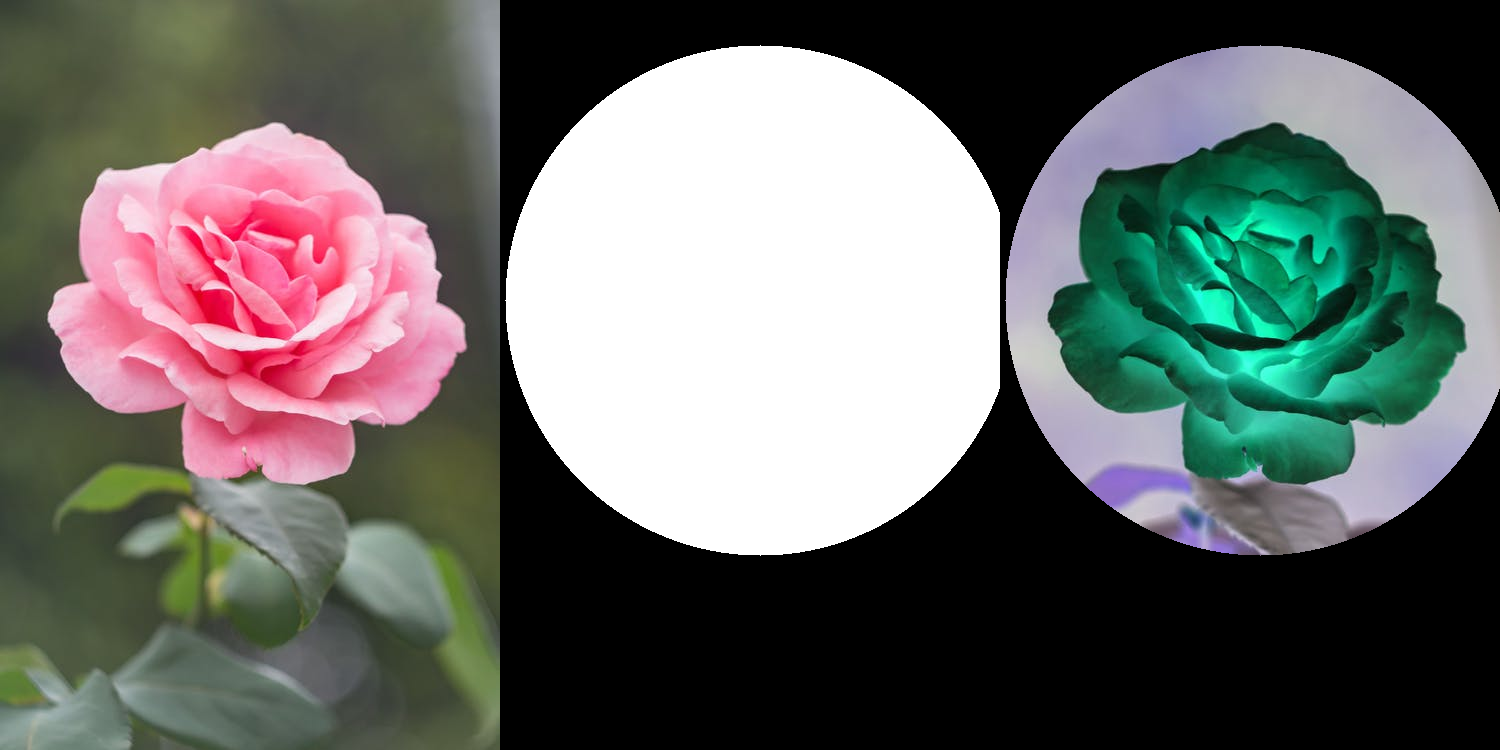

In [31]:
#Example using operator NAND

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260,300), 255, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

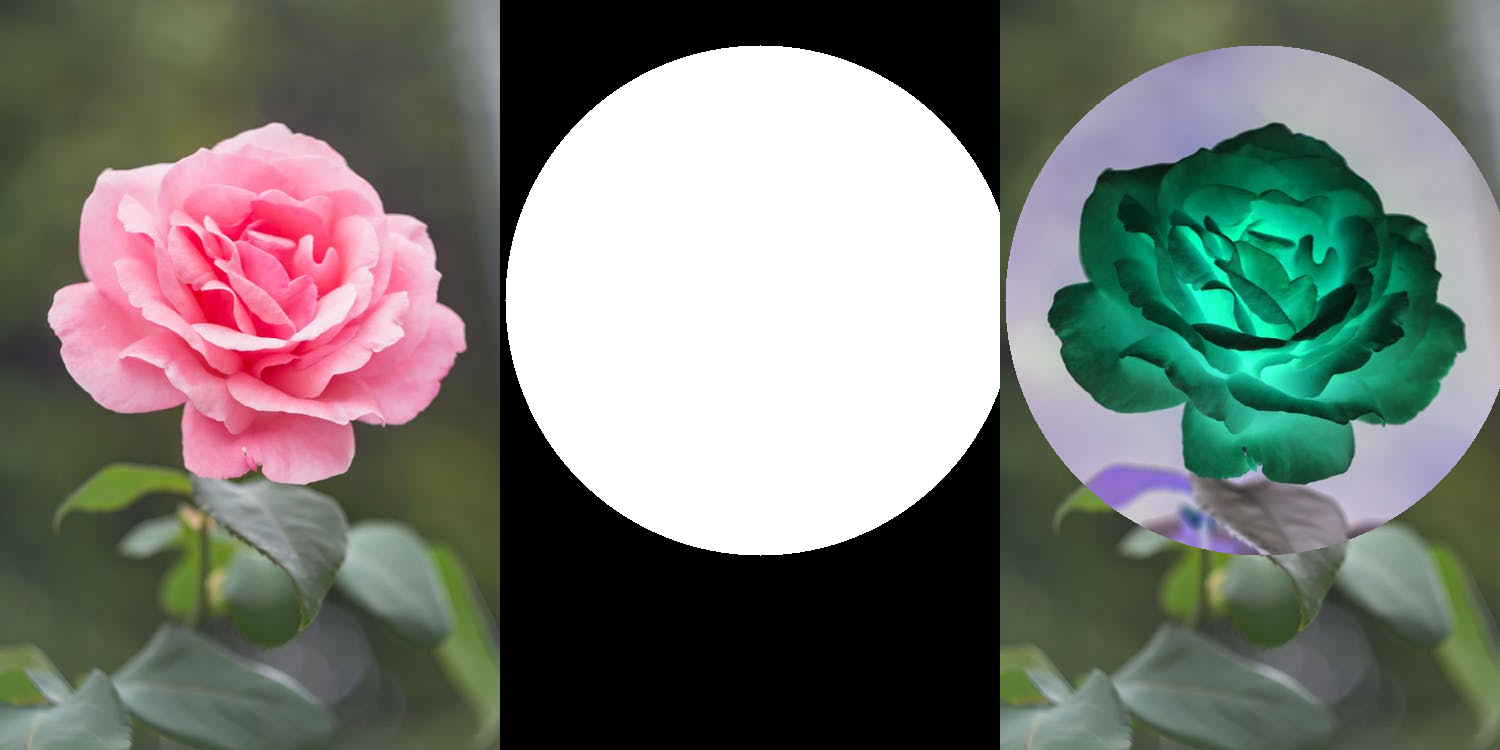

In [32]:
#Example using operator XOR

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260,300), 255, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)